In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("C:/Users/ACER/Downloads/car_age_price.csv")

In [5]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [6]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [27]:
# find the linear relationship between year and price

<AxesSubplot:>

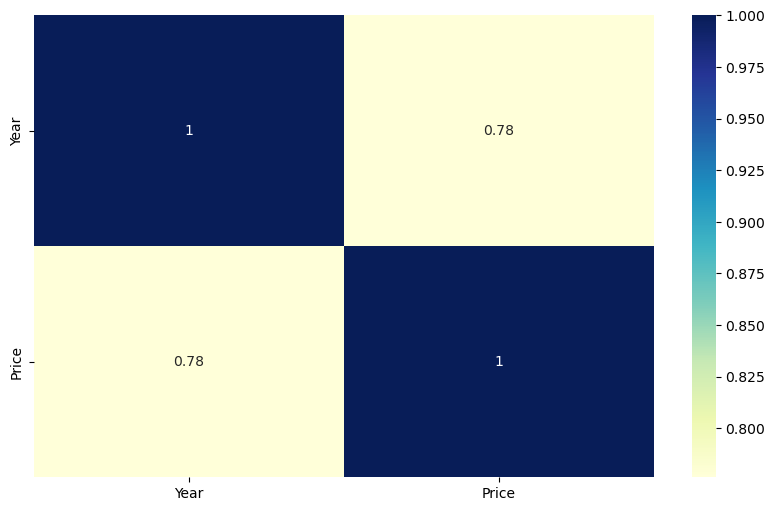

In [10]:
corr_matrix=data.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

In [11]:
import statsmodels.formula.api as smf

In [13]:
model=smf.ols('Price~Year',data=data)

In [14]:
model=model=model.fit()

In [15]:
Price_pred=model.predict()

In [16]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Year vs Price')

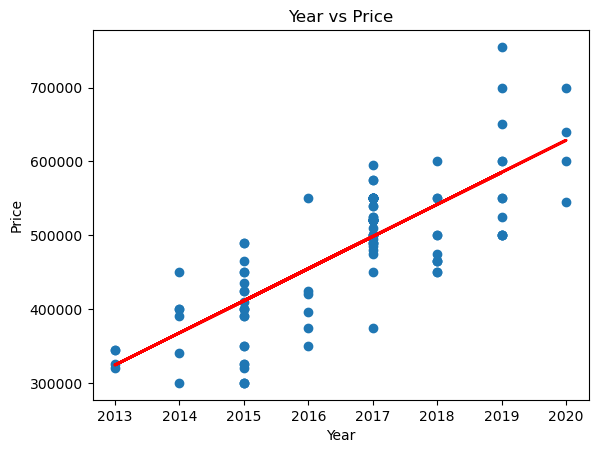

In [26]:
plt.plot(data['Year'],data['Price'],'o')
plt.plot(data['Year'],Price_pred,'r',linewidth=2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')

In [44]:
#predictions

In [29]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [33]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [34]:
data1=pd.get_dummies(data)

In [35]:
data1

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [37]:
y=data1['Price']
x=data1.drop('Year',axis=1)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42, test_size=0.2)

In [39]:
from sklearn.linear_model import LinearRegression
linear_regression =LinearRegression()
model=linear_regression.fit(x_train,y_train)
predictions= model.predict(x_test)

In [41]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [40]:
predictions

array([525000., 495000., 465000., 450000., 550000., 300000., 550000.,
       500000., 500000., 550000., 320000., 550000., 465000., 640000.,
       465000., 500000., 345000., 390000., 375000., 520000., 550000.,
       500000., 550000.])

In [42]:
from sklearn.metrics import mean_squared_error,r2_score

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE=:',mean_squared_error(y_test,predictions))
print('R squared value =:',r2_score(y_test,predictions))

MSE=: 7.365503889167829e-22
R squared value =: 1.0


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn. linear_model import Lasso

In [47]:
#lasso regression

In [55]:
df=pd.read_csv("C:/Users/ACER/Downloads/car_age_price.csv")

In [56]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [68]:
from sklearn. linear_model import Lasso

In [69]:
x=df.iloc[:,:-1].values

In [70]:
y=df.iloc[:,1].values

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [74]:
model = Lasso(alpha=1.0)

In [77]:
model. fit(x_train, y_train)

Lasso()

In [78]:
y_pred=model.predict(x_test)

In [80]:
print("predicted values",np.round(y_pred[:3],2))

predicted values [493795.93 452541.68 576304.44]


In [81]:
print("Real values",y_test[:3])

Real values [550000 396000 500000]


Text(0, 0.5, 'Price')

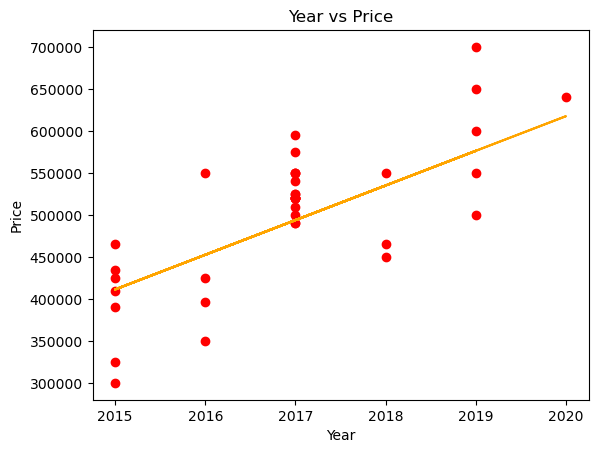

In [85]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='orange')
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')


In [ ]:
#lasso regression is performing better